# Detect an object and place bounding boxes around it

In this notebook we will learn how to draw boxes around the objects that have been detected by the Yolo model.

To begin, we will import the YOLO package.

In [25]:
# If you did not use the Workbench image designed for this Lab, you can uncomment and run the following line to install the required packages.
# !pip install --no-cache-dir --no-dependencies -r requirements.txt

from ultralytics import YOLO
from PIL import Image

In [26]:
# We are going to use the YOLOv8m model for object detection

model = YOLO("best.pt")

In [27]:
# Obtain the results for the model prediction on a test images

img = "images/bad-Unknown-6.jpeg"
results = model.predict(img)


image 1/1 /opt/app-root/src/sentiments/lab-materials/04/images/bad-Unknown-6.jpeg: 640x640 1 damaged, 204.7ms
Speed: 2.3ms preprocess, 204.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


In [28]:
# With YOLO you can submit an array of images, not just one, and you get an array of results.
# As we submitted only one image, we need to retrieve only the first (and only) element from our array of results.

result = results[0]

In [29]:
# Detect how many boxes were found

len(result.boxes)

1

In [30]:
# Analyze the box

box = result.boxes[0]
print("Object type:", box.cls)
print("Coordinates:", box.xyxy)
print("Probability:", box.conf)

Object type: tensor([1.])
Coordinates: tensor([[6.2885e-01, 2.5786e+00, 6.3722e+02, 6.4000e+02]])
Probability: tensor([0.9205])


In [31]:
# Unpack the actual values from the Tensor

cords = box.xyxy[0].tolist()
class_id = box.cls[0].item()
conf = box.conf[0].item()
print("Object type:", class_id)
print("Coordinates:", cords)
print("Probability:", conf)

Object type: 1.0
Coordinates: [0.62884521484375, 2.57861328125, 637.2196655273438, 640.0]
Probability: 0.9205417633056641


In [32]:
# COCO is the dataset on which the YOLO model has been trained. The objects it has been trained to detect are organized in classes. This is the info we got with the "Object type" field.
# The YOLOv8 result object also contains the 'names' property for these classes.

print(result.names)

{0: 'good', 1: 'damaged'}



We see that class number '2' correspond to an object.  So the bounding box in our result corresponds to a detected 'object'.
Let's draw the box on the image!


In [33]:
# First, put the coordinates in a list, and round them.
# Then get the name of the detected object class by ID using the result.names dictionary.

cords = box.xyxy[0].tolist()
cords = [round(x) for x in cords]
class_id = result.names[box.cls[0].item()]
conf = round(box.conf[0].item(), 2)
print("Object type:", class_id)
print("Coordinates:", cords)
print("Probability:", conf)

Object type: damaged
Coordinates: [1, 3, 637, 640]
Probability: 0.92


In [34]:
# Let's loop over all the boxes to extract the information.

for box in result.boxes:
  class_id = result.names[box.cls[0].item()]
  cords = box.xyxy[0].tolist()
  cords = [round(x) for x in cords]
  conf = round(box.conf[0].item(), 2)
  print("Object type:", class_id)
  print("Coordinates:", cords)
  print("Probability:", conf)
  print("---")

Object type: damaged
Coordinates: [1, 3, 637, 640]
Probability: 0.92
---


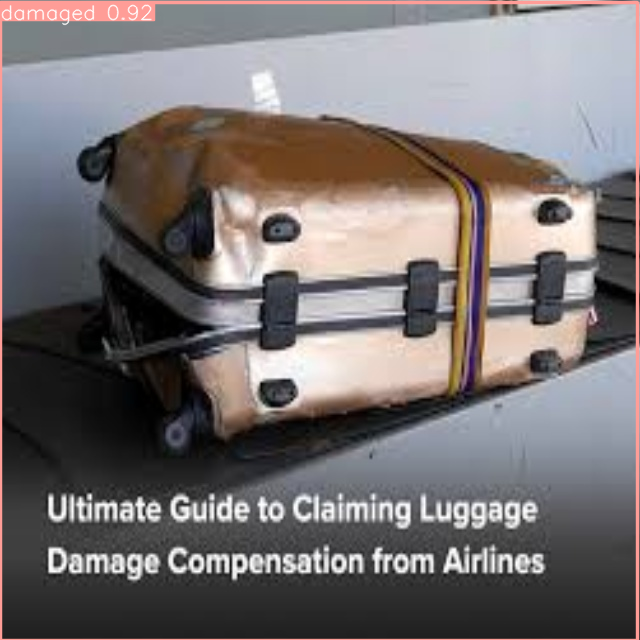

In [35]:
# On the image, draw the box, the name of the class, and the probability (how much the model is sure about the detection).

Image.fromarray(result.plot()[:,:,::-1])

Now, let's go back to the multiple objects image (carImage4.jpg) that we tested in the last notebook, and determine if yolo is indeed able to identify all the 'objects' in the image.

We can see that the YOLO model did miss some objects that are in the 'far back' of the image.  But overall, the model did a great job of identifying multiple objects in this image.  And more importantly we can see that the identified objects are surrounded by a 'bounding box'!

Now that we are able to place bounding boxes around the object(s) recognized by the yolo model, we can re-train our YOLO model. 

**Please open the notebook `04-03-model-retraining.ipynb`.**